# Data Analysis:

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from os import listdir
import glob
from PIL import Image
import cv2
from random import randrange
from sklearn.model_selection import train_test_split

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
ori_images = 'datasets/Images'
mask_images = 'datasets/Masks'

In [15]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(80, 40))
    for idx, img_path in enumerate(item_files):
        plt.subplot(7, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()

In [16]:
def Images_details_Print_data(data, path):
    print(" ====== Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)


Train data for Orinigal Images:

 ====== Images in:  datasets/Images
images_count:	420
min_width:	256
max_width:	584
min_height:	256
max_height:	584



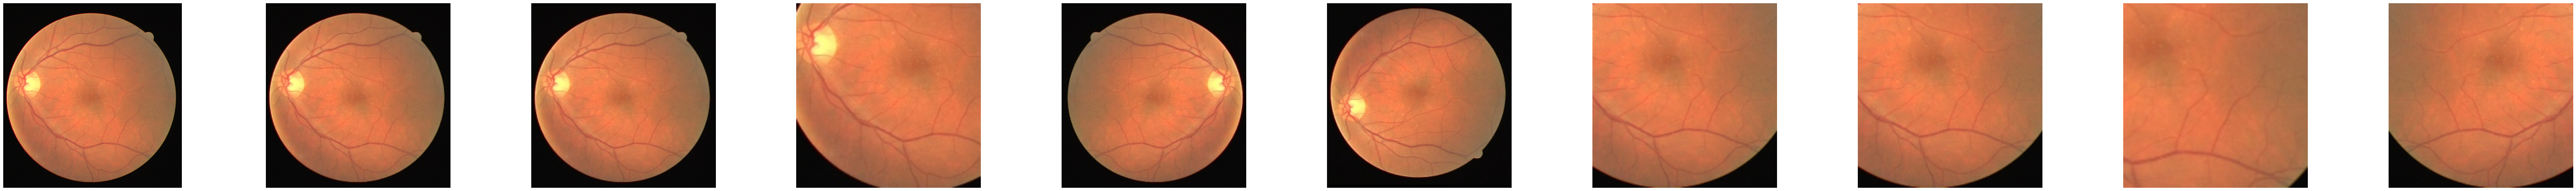

In [17]:
print("")
print("Train data for Orinigal Images:")
print("")
Images_details(ori_images)
print("")
plot_images(ori_images, 10)


Train data for Mask images:

 ====== Images in:  datasets/Masks
images_count:	420
min_width:	256
max_width:	584
min_height:	256
max_height:	584



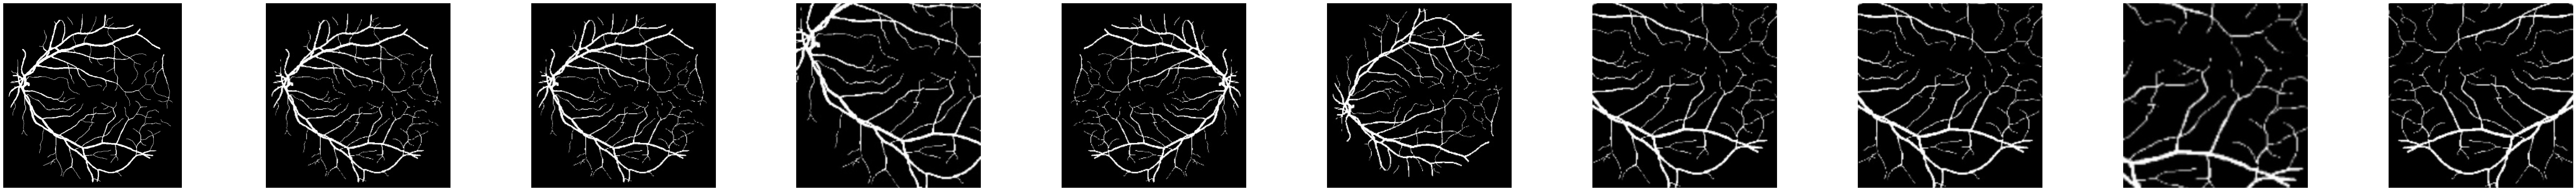

In [18]:
print("")
print("Train data for Mask images:")
print("")
Images_details(mask_images)
print("")
plot_images(mask_images, 10)

In [19]:
def load_data(split=0.2):
    images = [f for f in glob.glob(ori_images + "/*.jpg", recursive=True)]
    masks = [f for f in glob.glob(mask_images + "/*.jpg", recursive=True)]

    train_x, test_x = train_test_split(images, test_size=split, random_state=42)
    train_y, test_y = train_test_split(masks, test_size=split, random_state=42)

    return (train_x, train_y), (test_x, test_y)

In [20]:
dataset_path = "datasets"
(train_x, train_y), (test_x, test_y) = load_data()

print(f"Train: {len(train_x)} - {len(train_y)}")
print(f"Test: {len(test_x)} - {len(test_y)}")

Train: 336 - 336
Test: 84 - 84


In [21]:
train_x

['datasets/Images\\24_training_0_1.jpg',
 'datasets/Images\\27_training_0_3.jpg',
 'datasets/Images\\22_training_1_3.jpg',
 'datasets/Images\\25_training.jpg',
 'datasets/Images\\34_training_3.jpg',
 'datasets/Images\\38_training_2_2.jpg',
 'datasets/Images\\36_training_3_1.jpg',
 'datasets/Images\\28_training_1.jpg',
 'datasets/Images\\32_training_2_3.jpg',
 'datasets/Images\\30_training_2_3.jpg',
 'datasets/Images\\31_training.jpg',
 'datasets/Images\\21_training_0_3.jpg',
 'datasets/Images\\23_training_0_1.jpg',
 'datasets/Images\\34_training_1_1.jpg',
 'datasets/Images\\40_training_0_1.jpg',
 'datasets/Images\\38_training_0_2.jpg',
 'datasets/Images\\33_training_2_1.jpg',
 'datasets/Images\\21_training_3.jpg',
 'datasets/Images\\39_training_1_3.jpg',
 'datasets/Images\\32_training_3_0.jpg',
 'datasets/Images\\35_training_1_1.jpg',
 'datasets/Images\\21_training_0_1.jpg',
 'datasets/Images\\21_training_3_1.jpg',
 'datasets/Images\\39_training_2_3.jpg',
 'datasets/Images\\23_training

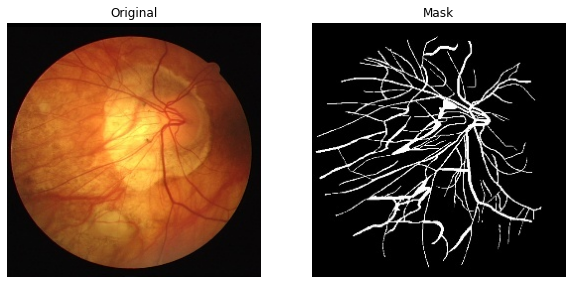

In [22]:
index = randrange(0, len(train_x))
check_i = plt.imread(train_x[index])
check_m = plt.imread(train_y[index])
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(check_i)
plt.axis('off')
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(check_i)
plt.axis('off')
plt.title("Mask")
plt.imshow(check_m)